In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import scipy.stats as spicystats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys
sys.path.insert(0, '../src/')
import functions

In [2]:
## creating dataframe and cleaning the dataset before analysis

df = functions.clean_dataset('../data/lending_club_loan_dataset.csv')

In [3]:
# creation of EDA dfs

df_categorical_eda = df[['home_ownership', 'purpose', 'term']]
df_numerical_eda = df[['emp_length_num', 'dti', 'revol_util', 'od_ratio']]
df_binary_eda = df[['short_emp', 'last_delinq_none']]
df_annual_income_eda = df['annual_inc']

Text(0.5, 1.0, 'Total Loan Count')

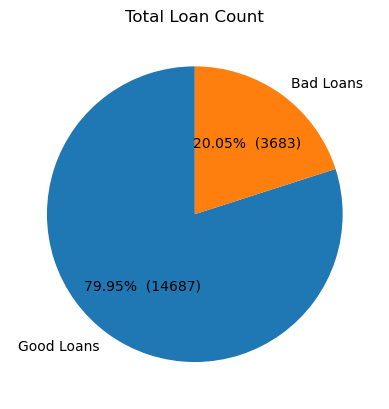

In [4]:
## grouping data together by loan outcome, finding total amount of good and bad loans

loans_grouped = df.groupby('bad_loan').count()

def make_autopct(values):
    def my_autopct(pct):
        total = np.sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v})'.format(p=pct,v=val)
    return my_autopct

make_autopct(loans_grouped.T.iloc[0])

fig, ax = plt.subplots()
ax.pie(loans_grouped['annual_inc'], labels=['Good Loans', 'Bad Loans'], \
        startangle=90, autopct=make_autopct(loans_grouped.T.iloc[0]), pctdistance=0.6)
ax.set_title("Total Loan Count")

# default rate of 0.2

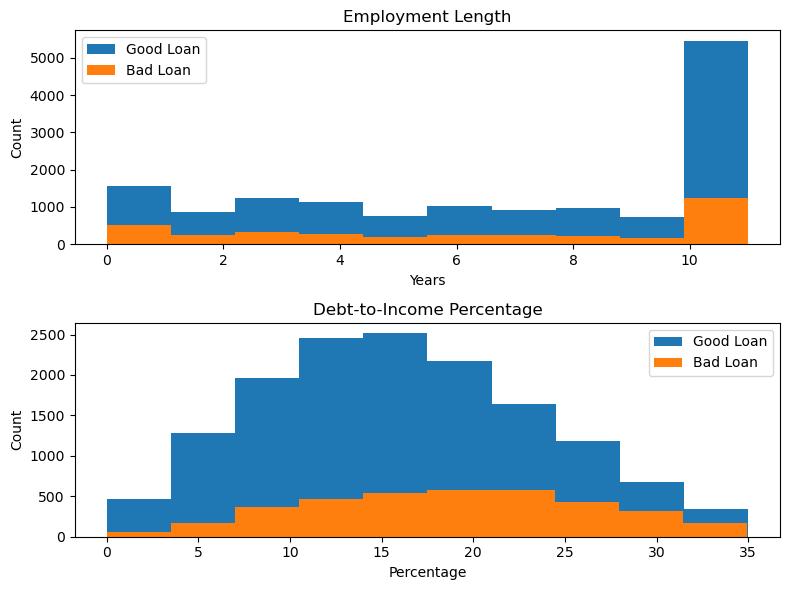

In [5]:
# numerical features distribution

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
for idx, val in enumerate(df_numerical_eda.columns[:2]):
    ax[idx].hist(df[val][df['bad_loan'] == 0], label='Good Loan')
    ax[idx].hist(df[val][df['bad_loan'] == 1], label='Bad Loan')
    ax[idx].set_title(val)
ax[0].set_title('Employment Length')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Count')
ax[1].set_title('Debt-to-Income Percentage')
ax[1].set_xlabel('Percentage')
ax[1].set_ylabel('Count')

ax[0].legend()
ax[1].legend()
fig.tight_layout()

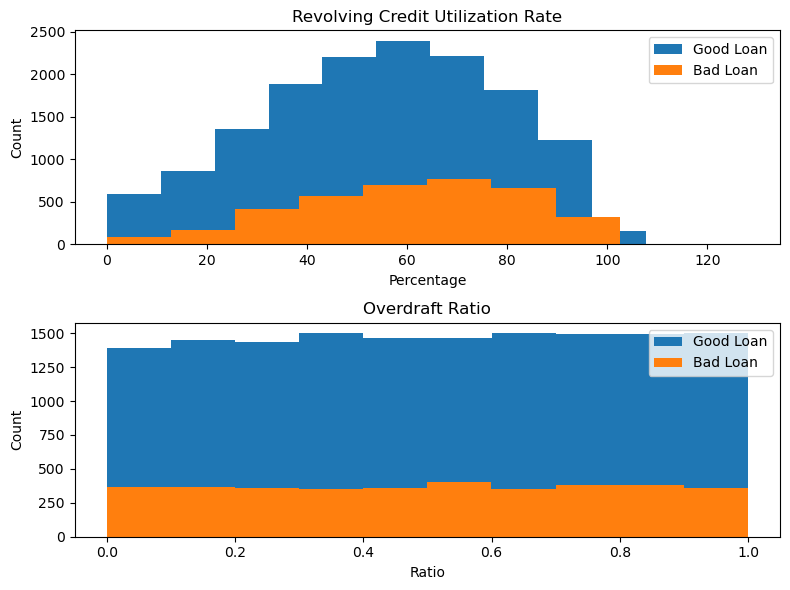

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
for idx, val in enumerate(df_numerical_eda.columns[2:]):
    ax[idx].hist(df[val][df['bad_loan'] == 0], label='Good Loan')
    ax[idx].hist(df[val][df['bad_loan'] == 1], label='Bad Loan')
    ax[idx].set_title(val)
    ax[0].set_title('Revolving Credit Utilization Rate')
    ax[0].set_xlabel('Percentage')
    ax[0].set_ylabel('Count')
    ax[1].set_title('Overdraft Ratio')
    ax[1].set_xlabel('Ratio')
    ax[1].set_ylabel('Count')

ax[0].legend()
ax[1].legend()
fig.tight_layout()

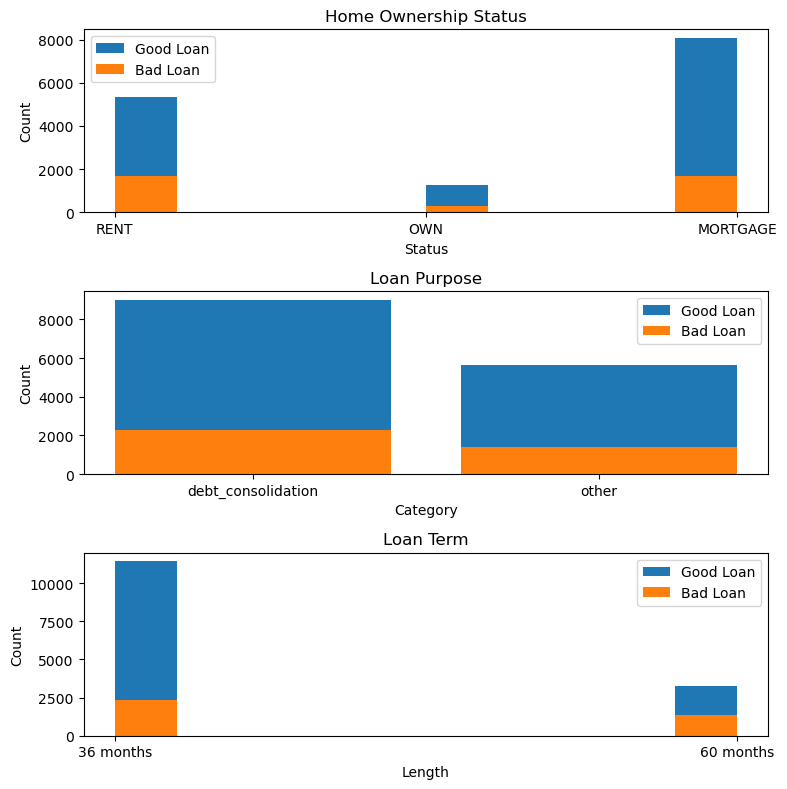

In [7]:
# categorical features distribution

boolean_mask1 = (df['purpose'] == 'debt_consolidation') & (df['bad_loan'] == 0)
boolean_mask2 = (df['purpose'] != 'debt_consolidation') & (df['bad_loan'] == 0)
boolean_mask3 = (df['purpose'] == 'debt_consolidation') & (df['bad_loan'] == 1)
boolean_mask4 = (df['purpose'] != 'debt_consolidation') & (df['bad_loan'] == 1)

fig, ax = plt.subplots(3,1, figsize=(8,8))
for idx, val in enumerate(df_categorical_eda.columns):
    if val == 'purpose':
        ax[idx].bar(0, df[val][boolean_mask1].count(), color=['tab:blue'], label='Good Loan')
        ax[idx].bar(1, df[val][boolean_mask2].count(), color=['tab:blue'])
        ax[idx].bar(0, df[val][boolean_mask3].count(), color=['tab:orange'], label='Bad Loan')
        ax[idx].bar(1, df[val][boolean_mask4].count(), color=['tab:orange'])
        ax[idx].set_xticks([0,1], ['debt_consolidation', 'other'])
    else:
        pass
        ax[idx].hist(df[val][df['bad_loan'] == 0], label='Good Loan')
        ax[idx].hist(df[val][df['bad_loan'] == 1], label='Bad Loan')
    ax[idx].set_title(val)
ax[0].set_title('Home Ownership Status')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Count')
ax[1].set_title('Loan Purpose')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[2].set_title('Loan Term')
ax[2].set_xlabel('Length')
ax[2].set_ylabel('Count')

ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()

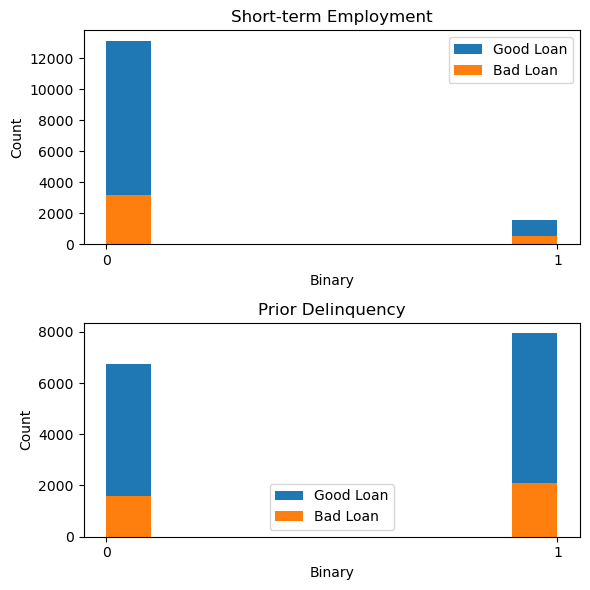

In [8]:
# binary features distribution

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
for idx, val in enumerate(df_binary_eda.columns):
    ax[idx].hist(df[val][df['bad_loan'] == 0], label='Good Loan')
    ax[idx].hist(df[val][df['bad_loan'] == 1], label='Bad Loan')
    ax[idx].set_title(val)
ax[0].set_title('Short-term Employment')
ax[0].set_xlabel('Binary')
ax[0].set_ylabel('Count')
ax[0].set_xticks([0,1])
ax[1].set_title('Prior Delinquency')
ax[1].set_xlabel('Binary')
ax[1].set_ylabel('Count')
ax[1].set_xticks([0,1])

ax[0].legend()
ax[1].legend()
fig.tight_layout()

/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_21621/3032706928.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['-$200,000', '$0', '$200,000', '$400,000', '$600,000', '$800,000', '$1,000,000'])


[Text(0, -200000.0, '-$200,000'),
 Text(0, 0.0, '$0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1,000,000'),
 Text(0, 1200000.0, '')]

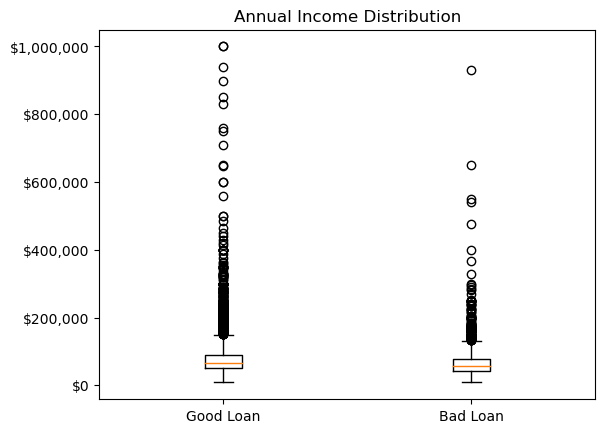

In [9]:
# annual income distribution

fig, ax = plt.subplots()
ax.boxplot([df['annual_inc'][df['bad_loan'] == 0], df['annual_inc'][df['bad_loan'] == 1]])
ax.set_xticklabels(['Good Loan', 'Bad Loan'])
ax.set_title('Annual Income Distribution')
ax.set_yticklabels(['-$200,000', '$0', '$200,000', '$400,000', '$600,000', '$800,000', '$1,000,000'])

Text(0.5, 0, 'Entry Number')

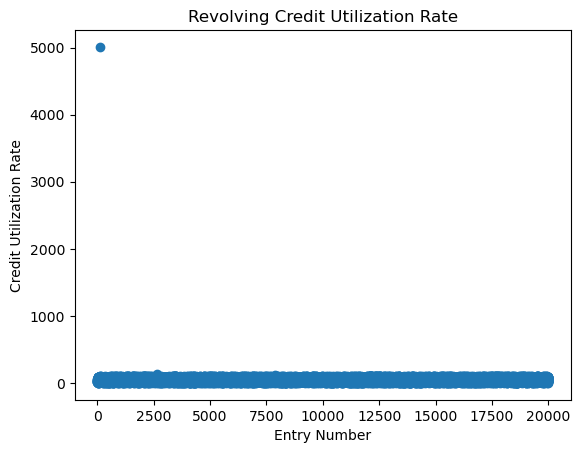

In [10]:
# extra info on finding outliers in 'revol_util' feature

df = pd.read_csv('../data/lending_club_loan_dataset.csv')
fig, ax = plt.subplots()
ax.scatter(df.index, df['revol_util'])
ax.set_title('Revolving Credit Utilization Rate')
ax.set_ylabel('Credit Utilization Rate')
ax.set_xlabel('Entry Number')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes: